<div style="color:red">!!! N.B. : Toutes les informations ci-dessous sont extraites à partir du fichier fourni dans le livrable et datant du 09/03/2017. <br> 
Aujourd'hui, le fichier a plus que doublé de volume, on est passé d'un peu moins de 140 000 enregistrements à plus de 326 000 grâce à l'apport d'enregistrements principalement américains. </div>

<h2>1- Description des données</h2>
<h5>Importation des données et des packages</h5>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# fichier des données, adresse à adapter
dfOriginel = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

<h5>Volume des données</h5>

In [123]:
print("Il y a {0} enregistrements et {1} variables".format(dfOriginel.shape[0], dfOriginel.shape[1]))

Il y a 139578 enregistrements et 161 variables


<h5>Doublons</h5>

La gestion automatique des doublons pose ici problème.<br>
On pourrait supprimer automatiquement tous les doublons sans se poser de question :

In [124]:
print(dfOriginel.shape)
df2 = dfOriginel.drop_duplicates(subset='code', keep='last')
print(df2.shape)

(139578, 161)
(139544, 161)


On voit que cela a supprimé 34 enregistrements. Le problème est de vérifier si ce sont des doublons réels !?

In [125]:
codes = dfOriginel.code.value_counts()
print(codes[codes>1])
dfOriginel.set_index('code').index.get_duplicates()

87177756       2
80007838       2
54491496       2
51500239131    2
41500007007    2
20004552       2
40600345002    2
20078171       2
54491472       2
24600          2
37600106245    2
51500255162    2
Name: code, dtype: int64


[nan,
 24600L,
 20004552L,
 20078171L,
 54491472L,
 54491496L,
 80007838L,
 87177756L,
 37600106245L,
 40600345002L,
 41500007007L,
 51500239131L,
 51500255162L]

Et lorsqu'on y regarde de plus près, on s'aperçoit que par exemple les 23 enregistrements qui n'ont pas de code (NaN) sont quand même des produits dont nombre d'informations sont renseignées. 
Les cas où les enregistrements ont des codes identiques sont plus problématiques car tous les cas sont représentés, porter sur des articles différents, ou sur les mêmes articles mais avec des informations différentes. Il devient dans ce cas difficile de choisir arbitrairement quel enregistrement garder.  
On pourrait utiliser les photographies des articles pour aider à voir si deux articles sont identiques, mais parfois pour une même marque il y a une déclinaison de design qui fait qu'il est difficile sans avoir le produit en main de déterminer s'il y a doublon ou non.
Il est donc préférable de considérer que ces doublons (sur le code) n'en sont pas puisque ces enregistrements possèdent des informations différentes. Ils sont donc maintenus. 

<h5>Données manquantes</h5> (pourcentage de NaN pour chaque variable, ordonné par ordre croissant)

In [126]:
dfNanOriginel = 100*(1-dfOriginel.count()/dfOriginel.shape[0])

print(dfNanOriginel.sort_values())  

last_modified_t                            0.000000
last_modified_datetime                     0.000000
creator                                    0.001433
created_t                                  0.002149
created_datetime                           0.006448
code                                       0.016478
url                                        0.016478
states                                     0.032956
states_fr                                  0.032956
states_tags                                0.032956
countries_tags                             0.202038
countries                                  0.202038
countries_fr                               0.202038
product_name                              13.078709
brands                                    19.547493
brands_tags                               19.551792
quantity                                  28.134806
pnns_groups_2                             36.368196
pnns_groups_1                             38.384273
energy_100g 

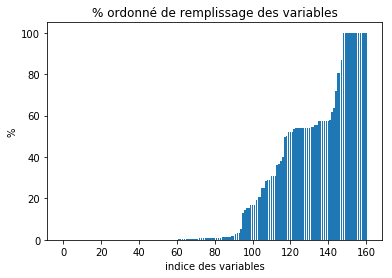

In [127]:
X = (100-dfNanOriginel).sort_values()
plt.bar(range(len(X)), X)
plt.xlabel("indice des variables")
plt.ylabel("%")
plt.title(u'% ordonné de remplissage des variables')

On peut mieux visualiser la proportion de NaN par variable avec ce graphique:

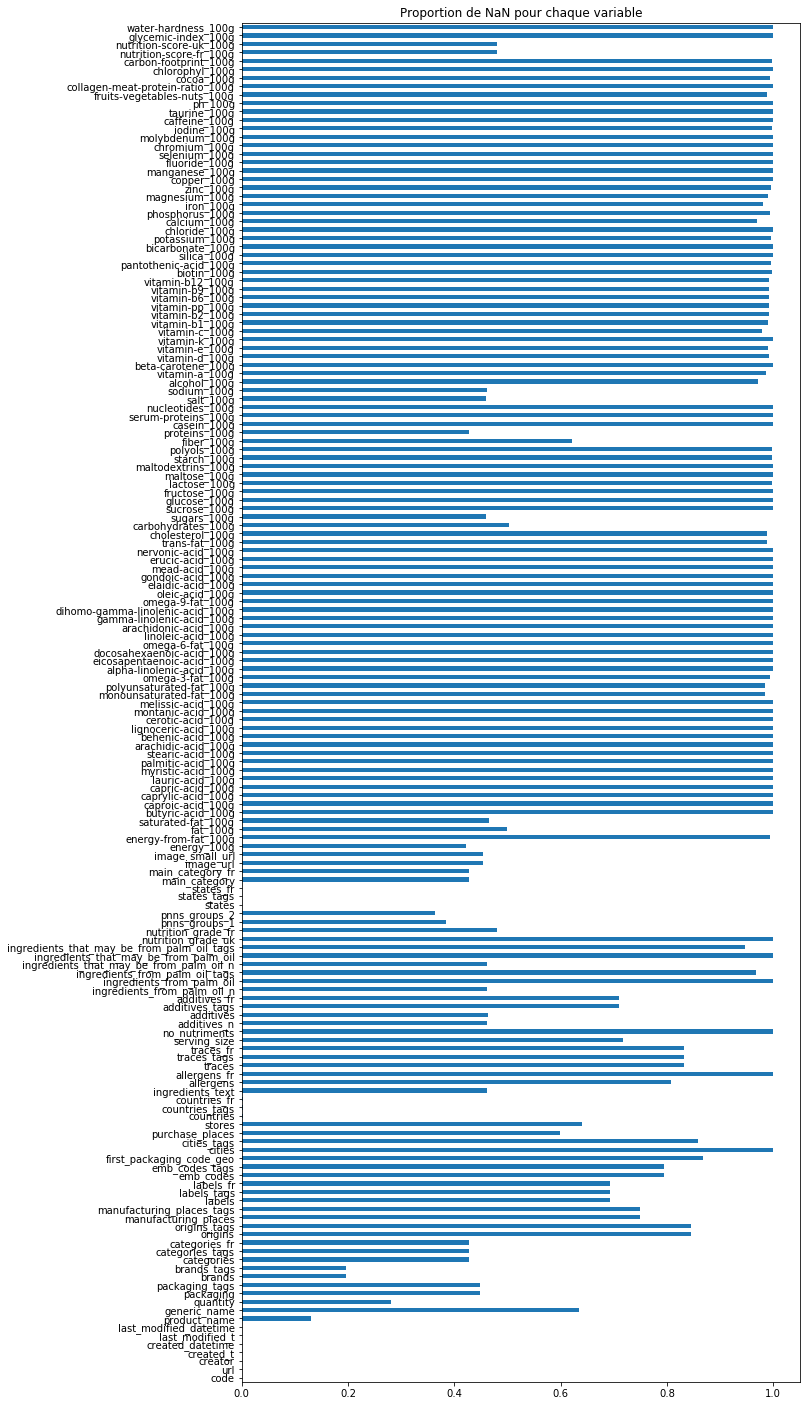

In [128]:
plt.figure(figsize=(10, 25))
dfOriginel.isnull().mean(axis=0).plot.barh()
plt.title("Proportion de NaN pour chaque variable")

<h5>Quelques informations sur le remplissage des variables :</h5>

In [129]:
print("Nombre de variables : {0}".format(dfOriginel.shape[1]))
print("Nombre de variables vides: {0} sur {1}".format(len((np.where(dfNanOriginel == 100.0))[0]), dfOriginel.shape[1]))
print("Nombre de variables non vides remplies à moins de 1%: {0} sur {1}".format(len(dfNanOriginel[(dfNanOriginel > 99.0) & (dfNanOriginel < 100.0)]), dfOriginel.shape[1]))
print("Nombre de variables remplies à plus de 90%: {0} sur {1}".format(len((np.where(dfNanOriginel < 10.0))[0]), dfOriginel.shape[1]))

# dataframe des variables décrivant des composants (se terminent par _100g)
dfComposant = pd.DataFrame()
i = 0
while i < dfOriginel.shape[1]:
    if (dfOriginel.dtypes[i] == np.float64) & ("_100g" in dfOriginel.columns[i]):
        dfComposant.insert(dfComposant.shape[1], dfOriginel.columns[i], dfOriginel[dfOriginel.columns[i]])
    i = i + 1
dfNanComposant = 100*(1-dfComposant.count()/dfComposant.shape[0])

print("Nombre de variables composant: {0}".format(dfNanComposant.shape[0]))
print("Nombre de variables composant vides: {0} sur {1}".format(len((np.where(dfNanComposant == 100.0))[0]), dfNanComposant.shape[0]))
print("Nombre de variables composant non vides remplies à moins de 1%: {0} sur {1}".format(len(dfNanComposant[(dfNanComposant > 99.0) & (dfNanComposant < 100.0)]), dfNanComposant.shape[0]))
print("Nombre de variables composant remplies à moins de 4 %: {0} sur {1}".format(len((np.where(dfNanComposant > 96.0))[0]), dfNanComposant.shape[0]))


Nombre de variables : 161
Nombre de variables vides: 16 sur 161
Nombre de variables non vides remplies à moins de 1%: 67 sur 161
Nombre de variables remplies à plus de 90%: 13 sur 161
Nombre de variables composant: 98
Nombre de variables composant vides: 12 sur 98
Nombre de variables composant non vides remplies à moins de 1%: 65 sur 98
Nombre de variables composant remplies à moins de 4 %: 87 sur 98


<u>Commentaires</u> : <br>
On remarque d'après ces résultats que la plupart des variables ne sont que très peu renseignées. Par exemple, sur les variables les plus importantes que sont les composants des articles, sur les 98 variables, seules 11 sont renseignées à plus de 4%. 

In [130]:
print(dfComposant.count().sort_values())

water-hardness_100g                     0
mead-acid_100g                          0
erucic-acid_100g                        0
chlorophyl_100g                         0
butyric-acid_100g                       0
caproic-acid_100g                       0
nervonic-acid_100g                      0
glycemic-index_100g                     0
melissic-acid_100g                      0
elaidic-acid_100g                       0
cerotic-acid_100g                       0
lignoceric-acid_100g                    0
montanic-acid_100g                      1
stearic-acid_100g                       1
palmitic-acid_100g                      1
myristic-acid_100g                      1
caprylic-acid_100g                      1
capric-acid_100g                        2
lauric-acid_100g                        4
maltose_100g                            4
arachidonic-acid_100g                   8
nucleotides_100g                        9
maltodextrins_100g                     11
molybdenum_100g                   

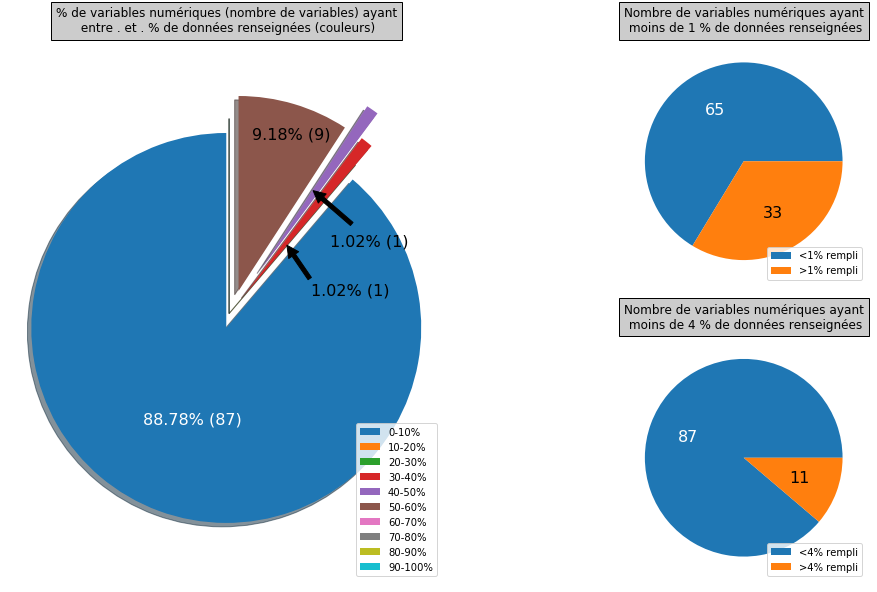

In [131]:
def make_autopct(values):
    def my_autopct(pct):
        """Customisation de l'affichage des valeurs {p:.2f}% ({v:d}) 
        Arguments:
        values -- nombres de variables pour chaque section
        pct -- pourcentages de variables pour chaque section
        """
        total = sum(values)
        val = int(round(pct*total/100.0))
        if val == 0:
            return ''
        else:
            return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
    return my_autopct

def make_autopct2(values):
    def my_autopct2(pct):
        """Customisation de l'affichage des valeurs {v:d} 
        Arguments:
        values -- nombres de variables pour chaque section
        pct -- pourcentages de variables pour chaque section
        """        
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct2

nb_enreg = dfOriginel.shape[0]
classement=[]
for i in range(10):
    classement.append(0)
for i in range (dfComposant.count().shape[0]):
    classement[dfComposant.count()[i]/(nb_enreg/10)] += 1

explode = (0.10, 0, 0, 0.1, 0.25, 0.1, 0, 0, 0, 0)

the_grid = GridSpec(2,2)
plt.clf()
plt.figure(figsize=(17,10))
plt.subplot(the_grid[:,0], aspect=1)
_, _, autotexts = plt.pie(classement, explode=explode, autopct=make_autopct(classement), startangle=90, shadow=True, pctdistance=0.5) #'%1.1f%%'
plt.title(u"% de variables numériques (nombre de variables) ayant\n entre . et . % de données renseignées (couleurs)", bbox={'facecolor':'0.8', 'pad':5})
autotexts[0].set_color('white')
autotexts[0].set_fontsize(16)
autotexts[3].set_color('black')
autotexts[3].set_fontsize(16)
autotexts[3].set_position((0.60, 0.10))
autotexts[4].set_color('black')
autotexts[4].set_fontsize(16)
autotexts[4].set_position((0.70, 0.35))
autotexts[5].set_color('black')
autotexts[5].set_fontsize(16)
autotexts[5].set_position((0.30, 0.90))
plt.axis('equal')
plt.annotate('', xy=(0.27, 0.34), xytext=(0.40, 0.15), arrowprops={'facecolor':'black', 'shrink':0.05})
plt.annotate('', xy=(0.40, 0.62), xytext=(0.62, 0.43), arrowprops={'facecolor':'black', 'shrink':0.05})
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
plt.legend(labels, loc='lower right')
values = [65, 33]
plt.subplot(the_grid[0,1], aspect=1)
_, _, autotexts = plt.pie(values, autopct=make_autopct2(values))
autotexts[0].set_color('white')
autotexts[1].set_color('black')
for i in range(2):
    autotexts[i].set_fontsize(16)
plt.title(u"Nombre de variables numériques ayant\n moins de 1 % de données renseignées", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(['<1% rempli', '>1% rempli'], loc='lower right')
plt.subplot(the_grid[1,1], aspect=1)
values = [87, 11]
_, _, autotexts = plt.pie(values, autopct=make_autopct2(values))
autotexts[0].set_color('white')
autotexts[1].set_color('black')
for i in range(2):
    autotexts[i].set_fontsize(16)
plt.title(u"Nombre de variables numériques ayant\n moins de 4 % de données renseignées", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(['<4% rempli', '>4% rempli'], loc='lower right')
plt.show()

<u>Commentaires</u> : <br>
(Les flèches ont un positionnement absolu, elles ne sont pas adaptées à un jeu de données récent où les sections sont différentes.)<br>
Comme certaines des variables ne sont pas du tout renseignées, sur ce jeu de donnée on peut écarter ces variables puisqu'elles ne participent pas à l'information. 
Mais qu'en est-il des autres variables, à partir de quel nombre de données peut-on se permettre de les supprimer du jeu afin de diminuer l'excès de complexité inutile (diminuer le nombre de variables) ? Comment comparer l'utilité de la variable montanic-acid_100g qui ne possède qu'un seul enregistrement de renseigné avec celle de la variable energy_100g qui en possède 80580 ? 
Prenons l'exemple de l'acide montanique dont la seule occurence se trouve dans l'enregistrement d'une huile d'olive bio. Son intérêt sur l'ensemble des 139578 articles est sans doute assez faible, du moins pour cet instantanné, à ce moment ponctuel de renseignement des informations. Mais supposons qu'une personne fasse demain une étude sur cet élément (dont l'esther semble être un additif (E912) dont la toxicité fasse débat) et ajoute dans les données la quantité de cet élément dans une centaine d'huiles différentes. Cette variable prendrait instantanément un grand intérêt pour l'étude d'un groupe particulier d'articles, les huiles. 
Alors quel seuil de renseignement peut-on choisir ? 10 %, 20%, 30 % ? 
Peut-on choisir un seuil vis-à-vis de la variance ? En effet si la variance est presque nulle, cela signifie que la distribution de la variable est proche d'une distribution constante, cela n'apporte donc pas d'information discriminante par rapport aux autres variables. Aussi, peut-on choisir un seuil de 0.01, 0.1, ... ? 
En l'absence de modèle possédant une métrique de performance permettant de comparer l'influence des différents seuils, il semble arbitraire de choisir un seuil de suppression de variable à ce point d'étude du jeu de données. 
Même si la possibilité que demain une étude porte sur une des variables actuellement non renseignées, on va se contenter pour l'instant de ne pas tenir compte des variables sans aucune donnée. 

<h5>Quelques remarques sur les données</h5>

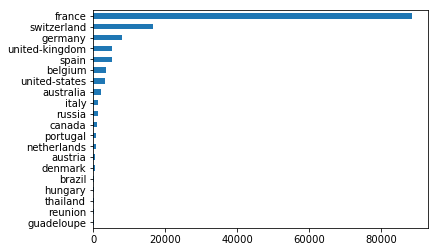

In [132]:
def no_null_objects(_df, columns=None):
    """
    Méthode qui ne sélectionne que les lignes sans NaN pour un ensemble de colonnes
    Arguments:
    _df -- le dataframe contenant les colonnes
    Retour: le dataframe épuré des lignes avec les NaN sur les colonnes données
    """
    if columns is None:
        columns = _df.columns
    return _df[np.logical_not(np.any(_df[columns].isnull().values, axis=1))]

def splitDataFrameList(_df, _target_column, _separator):
    """
    Méthode qui sépare les données pour une colonne donnée
    Arguments:
    _df -- le dataframe contenant la colonne
    _target_column -- la colonne cible
    _separator -- le séparateur de données
    Retour: le nouveau dataframe avec les données séparées
    """
    def splitListToRows(row, row_accumulator, _target_column, _separator):
        split_row = row[_target_column].split(_separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[_target_column] = s[3:] # suppression des 3 premiers caractères "en:" afin de n'avoir que le pays
            row_accumulator.append(new_row)
    new_rows = []
    _df.apply(splitListToRows,axis=1,args = (new_rows,_target_column,_separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

pays_representes = splitDataFrameList(no_null_objects(dfOriginel, ["countries_tags"]), "countries_tags", ",")
pays_nombre = pays_representes["countries_tags"].value_counts()
pays_nombre[:20][::-1].plot.barh()

On voit ainsi qu'une très grande majorité des articles renseignés sont des articles vendus en France.<br>
(Avec un jeu de donnée récent, même si les enregistrements français ont augmenté, ils sont largement dépassés par le nombre d'enregistrements américains.)

<h2>2- Début de feature engineering</h2>

<h5>Suppression des variables non renseignées dans le dataframe</h5>

In [133]:
dfOriginelSans100NaN = pd.DataFrame()
co = dfOriginel.count()
i = 0
while i < dfOriginel.shape[1]:
    if co[i] > 0:
        dfOriginelSans100NaN.insert(dfOriginelSans100NaN.shape[1], dfOriginel.columns[i], dfOriginel[dfOriginel.columns[i]])
    else:
        print(dfOriginel.columns[i])
        print(dfOriginel[dfOriginel.columns[i]].dtypes)
    i = i + 1
print("{0} variables supprimées.".format(dfOriginel.shape[1]-dfOriginelSans100NaN.shape[1]))

no_nutriments
float64
ingredients_from_palm_oil
float64
ingredients_that_may_be_from_palm_oil
float64
nutrition_grade_uk
float64
butyric-acid_100g
float64
caproic-acid_100g
float64
lignoceric-acid_100g
float64
cerotic-acid_100g
float64
melissic-acid_100g
float64
elaidic-acid_100g
float64
mead-acid_100g
float64
erucic-acid_100g
float64
nervonic-acid_100g
float64
chlorophyl_100g
float64
glycemic-index_100g
float64
water-hardness_100g
float64
16 variables supprimées.


<h5>séparation variables numériques / non numériques</h5>

In [134]:
dfContinues = pd.DataFrame()
dfNonContinues = pd.DataFrame()

i = 0
while i < dfOriginelSans100NaN.shape[1]:
    if dfOriginelSans100NaN.dtypes[i] == np.float64:
        dfContinues.insert(dfContinues.shape[1], dfOriginelSans100NaN.columns[i], dfOriginelSans100NaN[dfOriginelSans100NaN.columns[i]])
    else:
        dfNonContinues.insert(dfNonContinues.shape[1], dfOriginelSans100NaN.columns[i], dfOriginelSans100NaN[dfOriginelSans100NaN.columns[i]])
    i = i + 1

dfNanContinues = 100*(1-dfContinues.count()/dfContinues.shape[0])

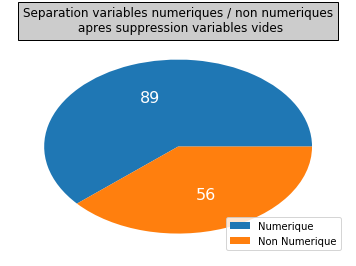

In [135]:
values = [dfContinues.shape[1], dfNonContinues.shape[1]]
_, _, autotexts = plt.pie(values, autopct=make_autopct2(values))
for i in range(2):
    autotexts[i].set_color('white')
    autotexts[i].set_fontsize(16)
plt.title("Separation variables numeriques / non numeriques\n apres suppression variables vides", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(['Numerique', 'Non Numerique'], loc='lower right')

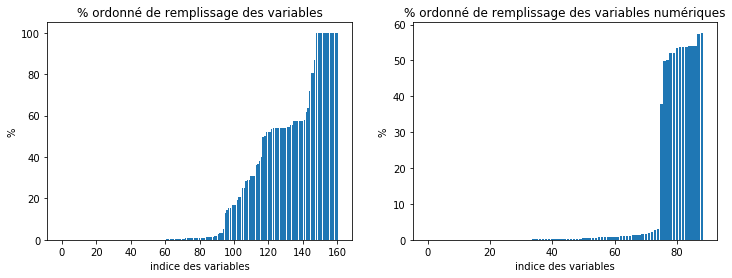

In [136]:
plt.figure(figsize=(12,4))

plt.subplot(121)

X1 = (100-dfNanOriginel).sort_values()
plt.bar(range(len(X1)), X1)
plt.xlabel("indice des variables")
plt.ylabel("%")
plt.title(u'% ordonné de remplissage des variables')

plt.subplot(122)

X2 = (100-dfNanContinues).sort_values()
plt.bar(range(len(X2)), X2)
plt.xlabel("indice des variables")
plt.ylabel("%")
plt.title(u'% ordonné de remplissage des variables numériques')

<u>Commentaires</u> :<br>
On voit ainsi que les variables qui sont bien remplies sont pour la plupart des variables textes (dont certaines sont remplies automatiquement). Les variables numériques ("composantes") sont, à quelques exceptions, très peu remplies, et lorsqu'on étudie le dataset, les variables les plus remplies sont soit des variables "construites" (scores, énergie), soit des variables "générales" (glucides, protéines, lipides) utilisées dans les calculs de diététique, ce qui semble cohérent puisque ce sont des variables qui regroupent des familles d'autres variables pour les calculs, on peut donc les calculer pour plus d'articles.

<h2>3- Statistiques univariées</h2>

<h5>Exemple de quelques statistiques pour les 3 premières variables continues</h5>

In [137]:
dfContinues3 = dfContinues.iloc[:,:15]
print(dfContinues3.describe())

        additives_n  ingredients_from_palm_oil_n  \
count  75074.000000                 75074.000000   
mean       1.690252                     0.062378   
std        2.444583                     0.244799   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        1.000000                     0.000000   
75%        3.000000                     0.000000   
max       31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g  \
count                             75074.000000  80580.000000   
mean                                  0.123771   1113.577614   
std                                   0.414943    884.148359   
min                                   0.000000      0.000000   
25%                                   0.000000    407.000000   
50%                                   0.000000   1022.000000   
75%                                   0.000000   1653.000000   
max                

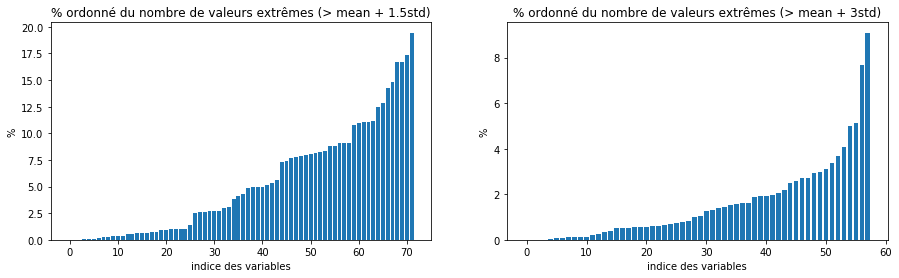

In [138]:
def graphe_extremes(_coeff):
    """Graphes des % de valeurs extrêmes 
    Arguments:
    _coeff -- coefficient multiplicateur pour déterminer le seuil (moyenne + coeff * écart-type)
    """
    valExtr = dfComposant[dfComposant>dfComposant.mean()+_coeff*dfComposant.std()].count()
    liste_nom_val_extreme = []
    valCo = dfComposant.count()
    for nom in dfComposant.columns:
        if valExtr[nom] > 0:
            liste_nom_val_extreme.append((nom, 100.0/valCo[nom]*valExtr[nom]))

    liste_nom_val_extreme_sorted = sorted(liste_nom_val_extreme, key=lambda x:x[1]) 
    liste_val_extreme_sorted = []
    for i in range(len(liste_nom_val_extreme_sorted)):
        liste_val_extreme_sorted.append(liste_nom_val_extreme_sorted[i][1])

    return liste_val_extreme_sorted

liste_val_extreme_sorted15 = graphe_extremes(1.5)
liste_val_extreme_sorted3 = graphe_extremes(3)

plt.clf()
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.bar(range(len(liste_val_extreme_sorted15)), liste_val_extreme_sorted15)
plt.xlabel("indice des variables")
plt.ylabel("%")
plt.title(u'% ordonné du nombre de valeurs extrêmes (> mean + 1.5std)')
plt.subplot(122)
plt.xlabel("indice des variables")
plt.ylabel("%")
plt.bar(range(len(liste_val_extreme_sorted3)), liste_val_extreme_sorted3)
plt.title(u'% ordonné du nombre de valeurs extrêmes (> mean + 3std)')
plt.show()
    


<u>Commentaires</u> :<br>
Que ce soit au-delà de 1.5 ou 3 std, le pourcentage de "valeurs extrêmes" est assez important. Comme le jeu de donnée ne regroupe pas que des catégories spécifiques d'articles, mais la totalité de ce qui peut exister dans toutes les catégories d'aliments possibles, il n'y a pas de raison d'annuler ces valeurs extrêmes (sinon, par exemple, ce serait comme vouloir annuler la valeur salt_100g de l'article "sel de table" parce qu'il n'y a pas beaucoup de sel dans la plupart des articles). L'étude des valeurs extrêmes doit donc se faire en rapport avec les catégories des articles.    

<h5>Moyennes des variables continues ordonnées afin de mettre en valeur des éventuelles données aberrantes</h5>

In [139]:
print(dfContinues.mean().sort_values())

gondoic-acid_100g                        0.000001
chromium_100g                            0.000192
selenium_100g                            0.000200
vitamin-k_100g                           0.000254
molybdenum_100g                          0.000401
iodine_100g                              0.000444
vitamin-b1_100g                          0.001844
vitamin-b6_100g                          0.003843
vitamin-b9_100g                          0.005091
vitamin-d_100g                           0.007075
fluoride_100g                            0.012011
silica_100g                              0.013269
cholesterol_100g                         0.015590
manganese_100g                           0.016190
vitamin-a_100g                           0.017343
nucleotides_100g                         0.021678
zinc_100g                                0.022723
iron_100g                                0.030880
vitamin-pp_100g                          0.044615
vitamin-b12_100g                         0.049513


<u>Commentaires</u> : <br>
Si la moyenne de 1113 pour la variable energy_100g semble valide, on peut s'interroger sur celles des trois dernières variables, proteins_100g, fat_100g et carbohydrates_100g.

<h5>Utilisation des boxplots afin de repérer d'éventuelles asymétries aberrantes</h5>

Comme on peut le voir par exemple avec les boxplots des variables oleic-acid_100g et polyols_100g dont les moyennes semblent cohérentes, il ne semble pas y avoir de valeurs aberrantes pour ces variables : 

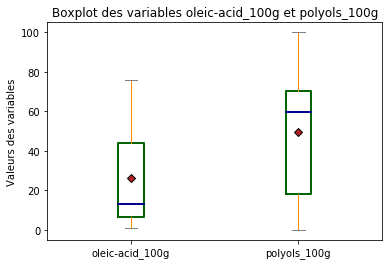

In [140]:
def dfBoxPlot(_df, _title):
    """Dessine le boxplot 
    Arguments:
    _df -- dataframe contenant les données initiales
    _title -- titre du boxplot
    """
    plt.clf() 
    colors=dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
    boxprops = dict(linewidth=2)
    medianprops = dict(linewidth=2)
    meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
    flierprops = dict(marker='o', linestyle='none', markerfacecolor='green', markersize=6)
    ax = _df.plot.box(showmeans=True, showfliers=True, flierprops=flierprops, boxprops=boxprops, medianprops=medianprops, color=colors, meanprops=meanpointprops)
    ax.set_ylabel('Valeurs des variables')
    ax.set_title(_title)
    plt.show()
    
dfBoxPlot(dfOriginel[["oleic-acid_100g", "polyols_100g"]], "Boxplot des variables oleic-acid_100g et polyols_100g")

Par contre, en ce qui concerne les variables proteins_100g, fat_100g et carbohydrates_100g, on peut voir qu'il y a des valeurs aberrantes qui sont hors de proportion par rapport au reste des données 

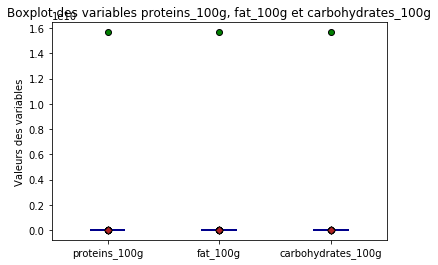

In [141]:
dfBoxPlot(dfOriginel[["proteins_100g", "fat_100g", "carbohydrates_100g"]], "Boxplot des variables proteins_100g, fat_100g et carbohydrates_100g")

Le problème se situe sur un seul enregistrement pour ces trois variables, celui qui possède comme code 15666666666, et dont la valeur pour ces trois variables est "15666666000". 
On peut donc considérer que ces valeurs perturbent ces variables, on peut les annuler afin de comparer l'éventuelle modification des moyennes :<br>
(dans le fichier téléchargé le 16/05/2017, cet enregistrement a disparu..., donc les boxplots pour ces 3 variables sont "normales")

On voit bien que l'annulation de ces 3 valeurs a rendu les moyennes plus cohérentes et que l'asymétrie a nettement diminué

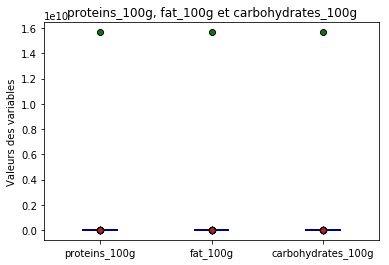

Moyenne d'avant annulation de la valeur aberrante : proteins_100g         196029.545926
fat_100g              223819.805820
carbohydrates_100g    225392.673923
dtype: float64


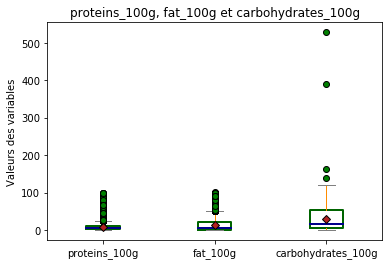

Moyenne d'apres annulation de la valeur aberrante : proteins_100g          7.549755
fat_100g              13.488768
carbohydrates_100g    28.144384
dtype: float64


In [142]:
# ajout de la variable code comme index afin de pouvoir jouer sur les code et non sur les index initiaux (n° de ligne)
dfBoxPlot(dfContinues[["proteins_100g", "fat_100g", "carbohydrates_100g"]], "proteins_100g, fat_100g et carbohydrates_100g")
print("Moyenne d'avant annulation de la valeur aberrante : {0}".format(dfContinues[["proteins_100g", "fat_100g", "carbohydrates_100g"]].mean()))
dfContinues = pd.concat([dfContinues, dfOriginel[['code']]], axis = 1)
dfContinues = dfContinues.set_index('code', drop=False)
dfContinues['proteins_100g'][15666666666] = 0
dfContinues['fat_100g'][15666666666] = 0
dfContinues['carbohydrates_100g'][15666666666] = 0  
dfBoxPlot(dfContinues[["proteins_100g", "fat_100g", "carbohydrates_100g"]], "proteins_100g, fat_100g et carbohydrates_100g")
print("Moyenne d'apres annulation de la valeur aberrante : {0}".format(dfContinues[["proteins_100g", "fat_100g", "carbohydrates_100g"]].mean()))

<h5>Asymétrie des variables</h5>

Il peut être intéressant de voir les asymétries des variables continues car dans le cas d'un modèle de régression linéaire, on souhaite se rapprocher d'une loi normale, donc diminuer si possible la valeur d'asymétrie (skewness) qui lorsqu'elle est trop forte, pose des problèmes.

In [143]:
# on supprime la colonne code de dfContinues qui a été rajoutée comme index
dfContinues.drop('code', axis=1, inplace=True)
tabSkewness = []
co = dfContinues.count()
X = []
Y = []
i = 0
while i < dfContinues.shape[1]:    
    if ~np.isnan(dfContinues[dfContinues.columns[i]].skew()):
        tabSkewness.append((dfContinues.columns[i], dfContinues[dfContinues.columns[i]].skew(), dfNanContinues[dfContinues.columns[i]], co[i]))
        Y.append(dfContinues[dfContinues.columns[i]].skew())
        X.append(co[i])
    i = i + 1
print(dfContinues.shape[1])
print(len(tabSkewness))

89
83


<u>Commentaires</u> : <br>
On observe une diminution du nombre de variables dans le tableau d'asymétrie car pour 6 variables, il n'y a qu'une seule donnée, ce qui est insuffisant pour obtenir une valeur d'asymétrie.

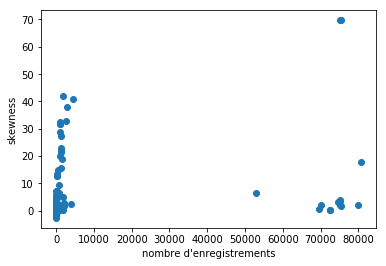

In [144]:
plt.scatter(X,Y)
plt.xlabel("nombre d'enregistrements")
plt.ylabel("skewness")
plt.show()

<u>Commentaires</u> : <br>
A première vue, on ne peut pas tirer de conclusion probante sur le rapport entre le nombre d'informations renseignées et l'asymétrie (si éventuellement le fait d'avoir un très fort ou un très faible nombre d'enregistrements avait eu une influence importante sur l'asymétrie).

Tableau ordonné des valeurs d'asymétrie :

In [145]:
tabSkewnessSorted = sorted(tabSkewness, key=lambda x:x[1])
for i in (range(10) + range(len(tabSkewnessSorted)-10, len(tabSkewnessSorted))):
    print(i, tabSkewnessSorted[i][0], tabSkewnessSorted[i][1], tabSkewnessSorted[i][3])

dfContinuesSkewed = pd.DataFrame()
i = 0
while i < len(tabSkewnessSorted):
    dfContinuesSkewed.insert(dfContinuesSkewed.shape[1], tabSkewnessSorted[i][0], dfOriginel[tabSkewnessSorted[i][0]])
    i = i + 1
dfContinuesSkewed['proteins_100g'][15666666666] = 0
dfContinuesSkewed['fat_100g'][15666666666] = 0
dfContinuesSkewed['carbohydrates_100g'][15666666666] = 0  

(0, 'ph_100g', -2.583380921870809, 48)
(1, 'lauric-acid_100g', -1.9801602809880994, 4)
(2, 'nucleotides_100g', -1.2280411229085035, 9)
(3, 'maltose_100g', -1.1060242031820748, 4)
(4, 'arachidic-acid_100g', -0.94658096930560698, 24)
(5, 'arachidonic-acid_100g', -0.87140299317678604, 8)
(6, 'behenic-acid_100g', -0.66800735653317789, 23)
(7, 'omega-9-fat_100g', -0.019217123112049355, 21)
(8, 'polyols_100g', -0.00064467431803728566, 394)
(9, 'gondoic-acid_100g', 0.0, 14)
(73, 'phosphorus_100g', 28.989326493217128, 895)
(74, 'vitamin-b9_100g', 31.766862187004374, 1146)
(75, 'vitamin-b12_100g', 31.903059770600098, 1018)
(76, 'vitamin-d_100g', 32.648861918508864, 1066)
(77, 'iron_100g', 32.79174162063817, 2641)
(78, 'vitamin-c_100g', 37.922425496103266, 2879)
(79, 'calcium_100g', 40.918177642581369, 4367)
(80, 'vitamin-a_100g', 41.922024411421646, 1929)
(81, 'sodium_100g', 69.702219012437254, 75268)
(82, 'salt_100g', 69.713506462887423, 75316)


<h5>Graphes des distributions des variables continues non vides ayant une valeur de skew</h5>

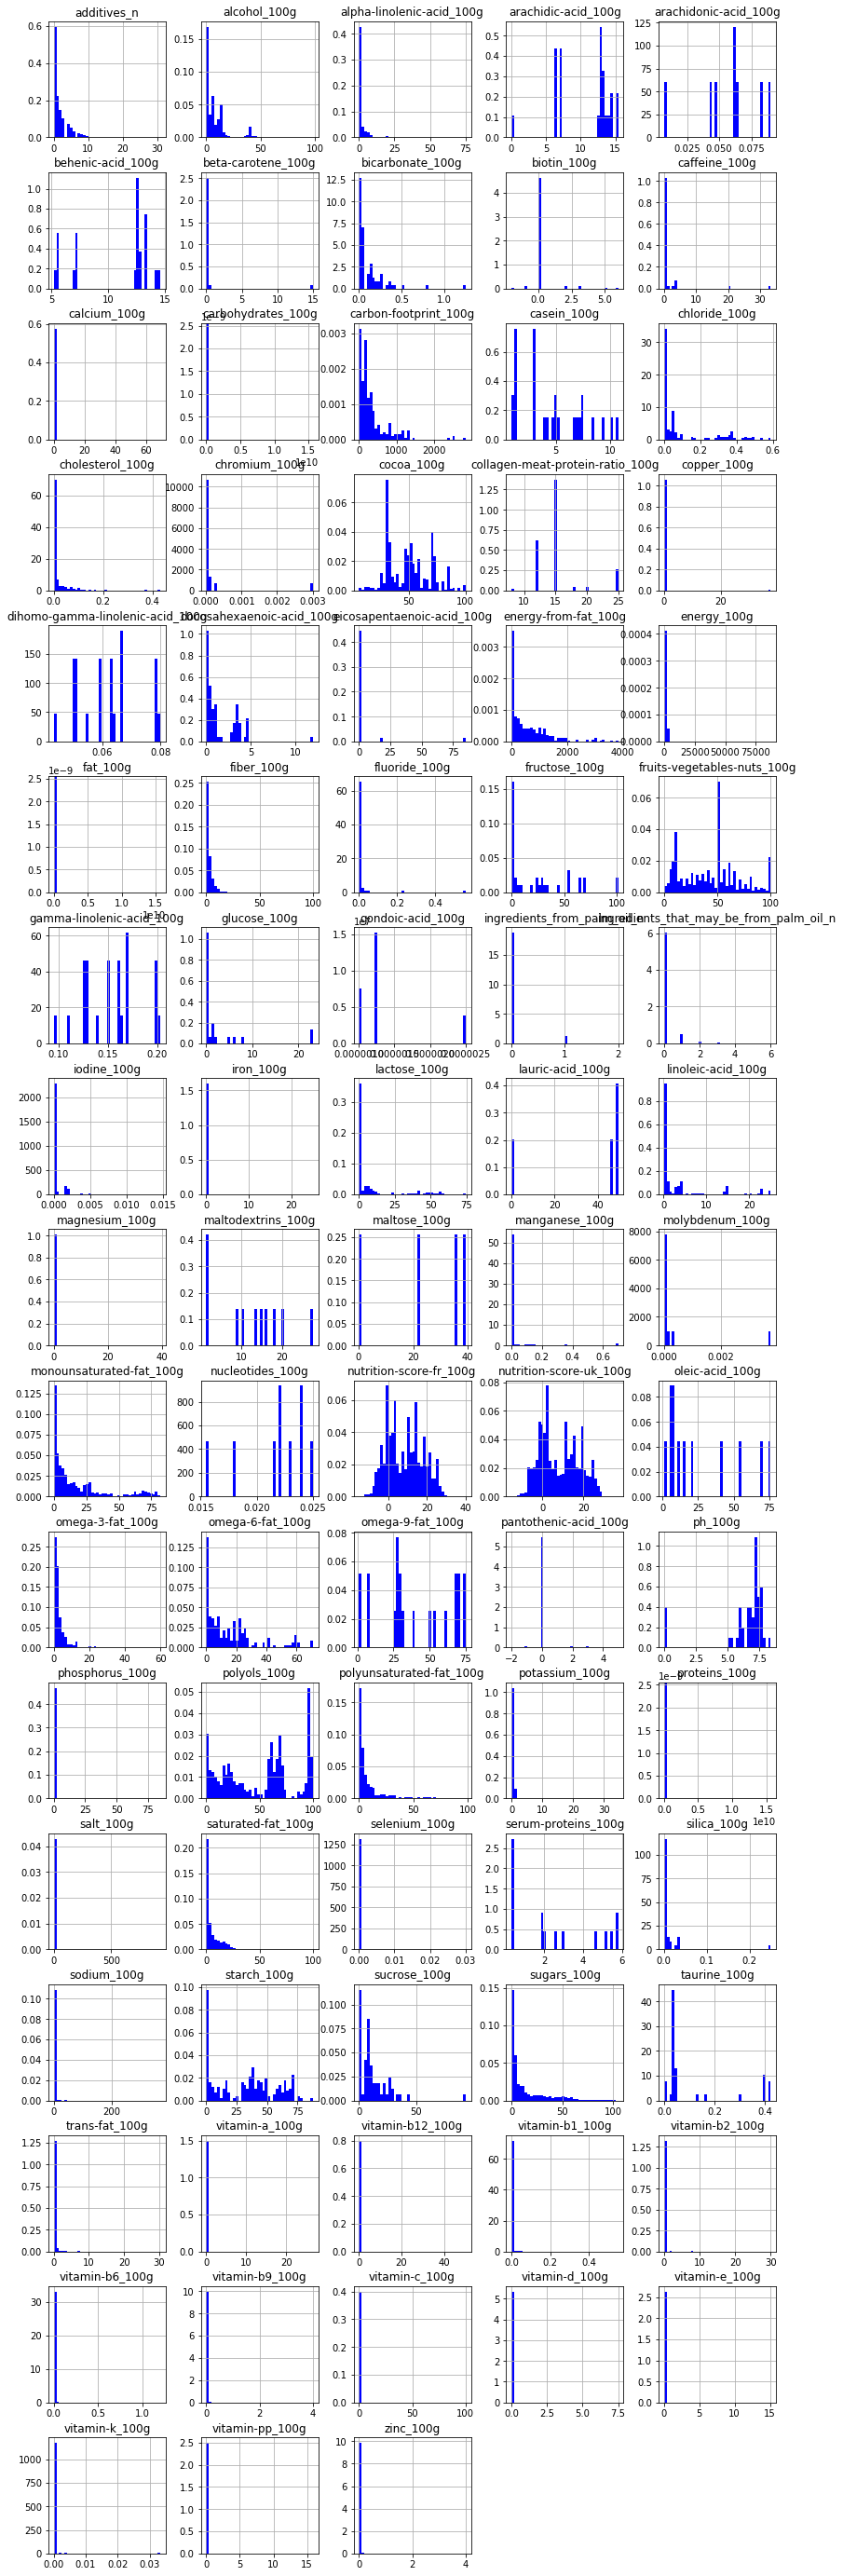

In [146]:
dfContinuesSkewed.hist(figsize=(14,50), color="blue", bins=40, normed=True, layout=(17,5))
plt.show()

<h5>Etude de l'influence d'une transformation sur l'asymétrie des variables</h5>

Si l'on souhaite diminuer les valeurs d'asymétrie de certaines variables, on peut regarder l'évolution de ces valeurs lors de différentes transformations, par exemple en utilisant les fonctions logarithme et racine carrée

In [147]:
tabRatLog = []
tabRatRac = []

for i in range(dfContinuesSkewed.shape[1]):
    skewNorm = dfContinuesSkewed[dfContinuesSkewed.columns[i]].skew()   # skew variable originelle X
    logcol = np.log(1+dfContinuesSkewed[dfContinuesSkewed.columns[i]])  # variable log(1 + X)
    skewLog = logcol.skew()                                             # skew variable log(1 + X)
    sqrtcol = np.sqrt(dfContinuesSkewed[dfContinuesSkewed.columns[i]])  # variable sqrt(X)
    skewRac = sqrtcol.skew()                                            # skew variable sqrt(X)
    ratLog = np.abs(skewLog/skewNorm)                                   # ratio skewLog/skewNorm
    tabRatLog.append(np.log(ratLog))
    ratRac = np.abs(skewRac/skewNorm)                                   # ratio skewRac/skewNorm
    tabRatRac.append(np.log(ratRac))

Graphe du ratio skewLog/skewNorm afin de voir quelles sont les variables dont le passage au log est bénéfique pour le skew :

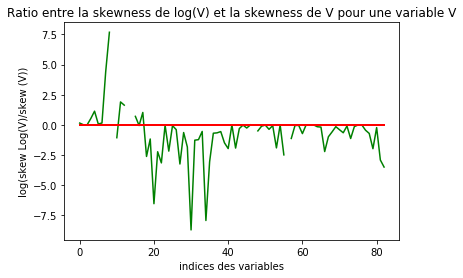

In [148]:
plt.figure(1)
x = np.arange(dfContinuesSkewed.shape[1])
y = tabRatLog
plt.plot(x,y,'g')
plt.plot([0, dfContinuesSkewed.shape[1]-1], [0,0], 'r-', lw=2)
plt.xlabel('indices des variables')
plt.ylabel('log(skew Log(V)/skew (V))')
plt.title('Ratio entre la skewness de log(V) et la skewness de V pour une variable V')
plt.show()

Graphe du ratio skewRac/skewNorm afin de voir quelles sont les variables dont le passage à la racine carrée est bénéfique pour le skew :

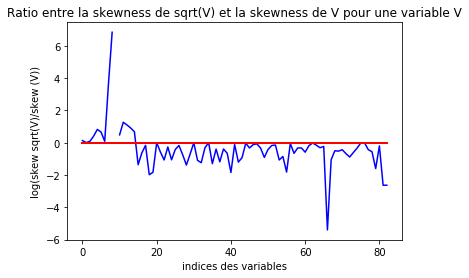

In [149]:
plt.figure(2)
x = np.arange(dfContinuesSkewed.shape[1])
y = tabRatRac
plt.plot(x,y,'b')
plt.plot([0, dfContinuesSkewed.shape[1]-1], [0,0], 'r-', lw=2)
plt.xlabel('indices des variables')
plt.ylabel('log(skew sqrt(V)/skew (V))')
plt.title('Ratio entre la skewness de sqrt(V) et la skewness de V pour une variable V')
plt.show()

<u>Commentaires</u> : <br>
On voit donc qu'à partir d'un certain niveau d'asymétrie, utiliser une fonction comme le logarithme ou la racine carrée améliore la valeur de skewness. 

Par exemple, pour la variable energy_100g : 

In [150]:
n = tabRatRac.index(min(tabRatRac))
print("On a un log du ratio skew(rac) / skew(norm) de {0}".format(tabRatRac[n]))
skewNorm = dfContinuesSkewed[dfContinuesSkewed.columns[n]].skew()
print("On a en effet une valeur initiale de skew de {0}".format(skewNorm))
sqrtcol = np.sqrt(dfContinuesSkewed[dfContinuesSkewed.columns[n]])
skewRac = sqrtcol.skew()  
print("et une valeur de skew de la racine carrée de la variable de {0}".format(skewRac))
ratRac = np.abs(skewRac/skewNorm)
print("On obtient donc un ratio de {0} et un log du ratio de {1}".format(ratRac, np.log(ratRac)))
print("\nLa transformation de la variable energy_100g à l'aide de la fonction racine carrée permet de diviser son coefficient \nd'asymétrie par plus de 220 ( = {0} / {1})".format(skewNorm, skewRac))  

On a un log du ratio skew(rac) / skew(norm) de -5.39765420104
On a en effet une valeur initiale de skew de 17.7193285234
et une valeur de skew de la racine carrée de la variable de 0.080218738017
On obtient donc un ratio de 0.00452718837009 et un log du ratio de -5.39765420104

La transformation de la variable energy_100g à l'aide de la fonction racine carrée permet de diviser son coefficient 
d'asymétrie par plus de 220 ( = 17.7193285234 / 0.080218738017)


On peut essayer de voir s'il n'y a pas d'autres valeurs aberrantes grâce aux boxplots et à un éventuel trop grand écart entre le max et la moyenne ou les 75% : 

         ph_100g
count  48.000000
mean    6.388733
std     2.052926
min     0.000000
25%     6.275000
50%     7.100000
75%     7.400000
max     8.400000


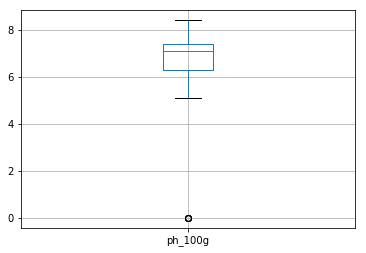

       lauric-acid_100g
count          4.000000
mean          36.136182
std           24.101433
min            0.044730
25%           34.661183
50%           47.600000
75%           49.075000
max           49.300000


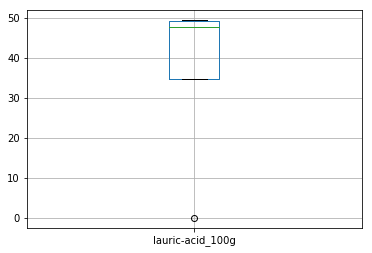

       nucleotides_100g
count          9.000000
mean           0.021678
std            0.003072
min            0.015500
25%            0.021600
50%            0.022000
75%            0.024000
max            0.025000


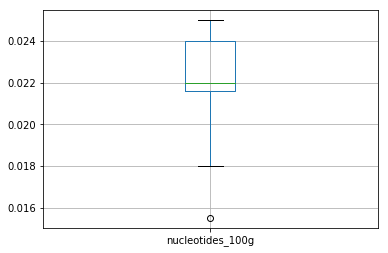

       maltose_100g
count      4.000000
mean      24.325000
std       17.793515
min        0.100000
25%       16.525000
50%       29.000000
75%       36.800000
max       39.200000


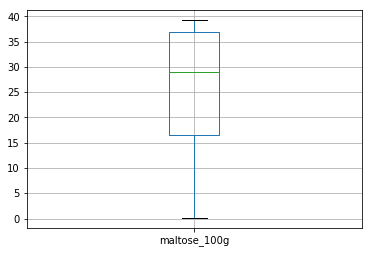

       arachidic-acid_100g
count            24.000000
mean             10.752667
std               4.019993
min               0.064000
25%               7.275000
50%              12.850000
75%              13.375000
max              15.400000


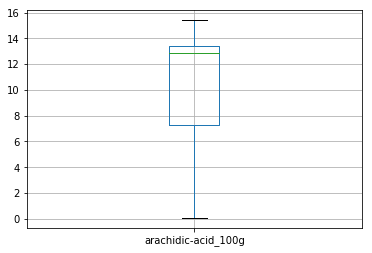

       arachidonic-acid_100g
count               8.000000
mean                0.057000
std                 0.025534
min                 0.007000
25%                 0.046250
50%                 0.061000
75%                 0.068500
max                 0.090000


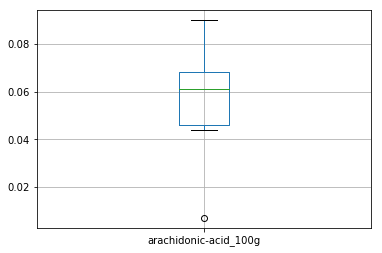

       behenic-acid_100g
count          23.000000
mean           10.673913
std             3.379647
min             5.200000
25%             7.100000
50%            12.600000
75%            13.050000
max            14.600000


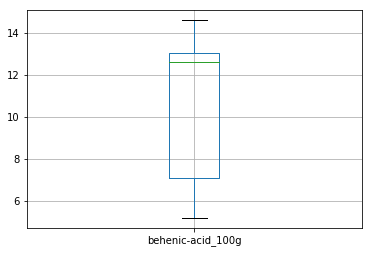

       omega-9-fat_100g
count         21.000000
mean          40.192857
std           25.175674
min            1.000000
25%           27.000000
50%           31.000000
75%           68.000000
max           75.000000


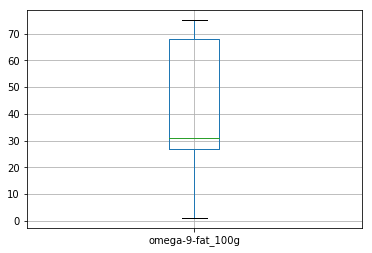

       polyols_100g
count    394.000000
mean      49.709470
std       33.281785
min        0.000000
25%       18.050000
50%       59.750000
75%       70.150000
max      100.000000


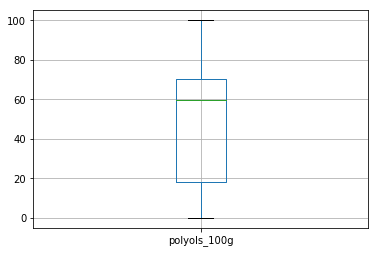

       gondoic-acid_100g
count       1.400000e+01
mean        1.357143e-06
std         4.972452e-07
min         1.000000e-06
25%         1.062500e-06
50%         1.250000e-06
75%         1.250000e-06
max         2.500000e-06


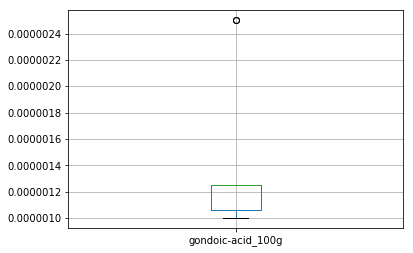

       gamma-linolenic-acid_100g
count                  24.000000
mean                    0.153842
std                     0.029160
min                     0.095000
25%                     0.130000
50%                     0.155000
75%                     0.170000
max                     0.203200


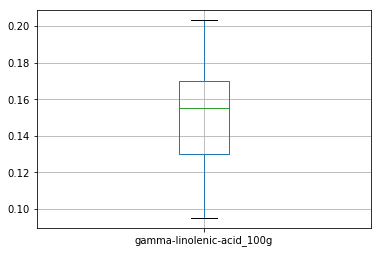

       starch_100g
count   261.000000
mean     31.689080
std      24.680369
min       0.000000
25%       4.400000
50%      35.700000
75%      50.000000
max      87.800000


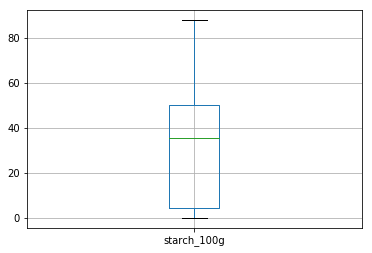

       maltodextrins_100g
count           11.000000
mean            12.163636
std              8.372129
min              1.500000
25%              5.400000
50%             13.500000
75%             16.950000
max             27.500000


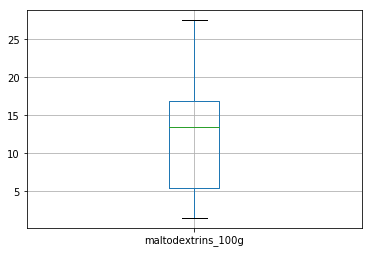

       nutrition-score-fr_100g
count             72599.000000
mean                  8.563162
std                   9.124307
min                 -15.000000
25%                   1.000000
50%                   8.000000
75%                  15.000000
max                  40.000000


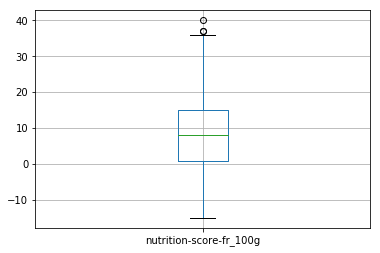

       nutrition-score-uk_100g
count             72599.000000
mean                  8.349619
std                   9.432866
min                 -15.000000
25%                   0.000000
50%                   7.000000
75%                  16.000000
max                  37.000000


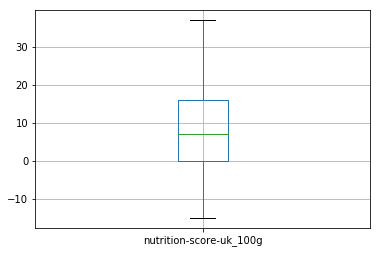

       cocoa_100g
count  881.000000
mean    49.779569
std     18.750402
min      6.000000
25%     32.000000
50%     50.000000
75%     65.000000
max    100.000000


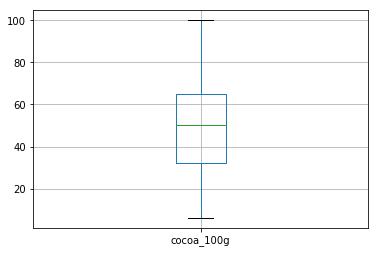

       dihomo-gamma-linolenic-acid_100g
count                         23.000000
mean                           0.061567
std                            0.010597
min                            0.043307
25%                            0.051181
50%                            0.062992
75%                            0.066929
max                            0.080000


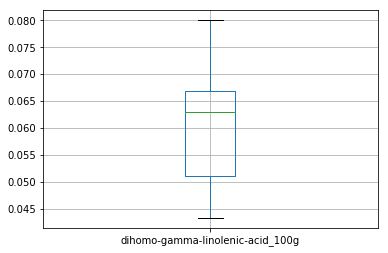

       fruits-vegetables-nuts_100g
count                  1719.000000
mean                     43.209872
std                      26.522181
min                       0.000000
25%                      18.200000
50%                      47.500000
75%                      60.000000
max                     100.000000


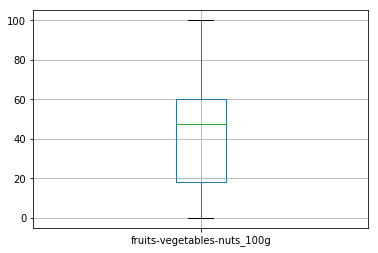

       serum-proteins_100g
count            16.000000
mean              2.506250
std               2.186769
min               0.300000
25%               0.300000
50%               1.950000
75%               4.750000
max               5.800000


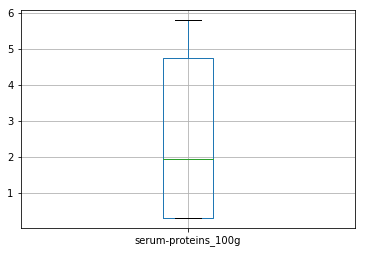

       casein_100g
count    27.000000
mean      4.658148
std       2.976340
min       0.920000
25%       2.150000
50%       4.200000
75%       7.100000
max      10.700000


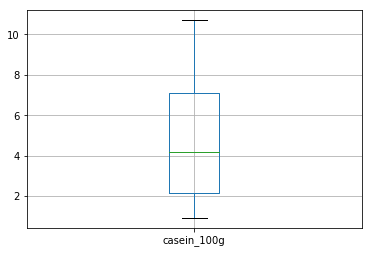

       carbohydrates_100g
count        6.951700e+04
mean         2.253927e+05
std          5.941978e+07
min          0.000000e+00
25%          4.500000e+00
50%          1.500000e+01
75%          5.310000e+01
max          1.566667e+10


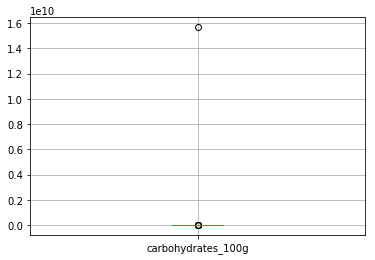

       oleic-acid_100g
count          12.0000
mean           26.3000
std            26.8031
min             1.0800
25%             6.6500
50%            13.2500
75%            43.8000
max            76.0000


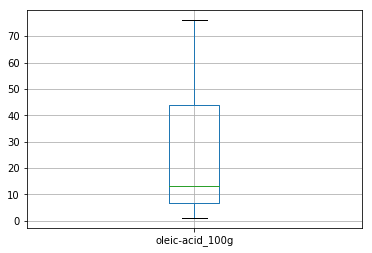

       fructose_100g
count      37.000000
mean       24.975676
std        29.879335
min         0.000000
25%         0.900000
50%         8.000000
75%        43.000000
max       101.000000


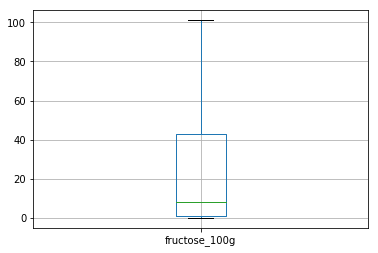

       taurine_100g
count     36.000000
mean       0.120614
std        0.152730
min        0.000000
25%        0.035000
50%        0.039500
75%        0.137500
max        0.423000


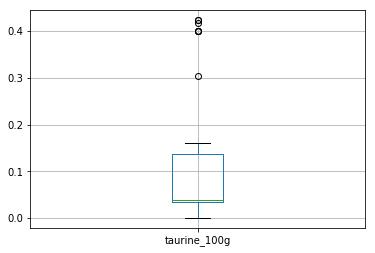

       omega-6-fat_100g
count        188.000000
mean          15.565048
std           17.066906
min            0.050000
25%            1.850000
50%            9.050000
75%           23.000000
max           71.000000


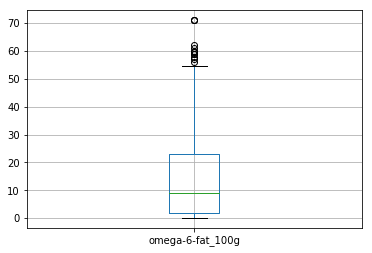

       chloride_100g
count     155.000000
mean        0.093874
std         0.150870
min         0.000002
25%         0.001385
50%         0.013700
75%         0.078500
max         0.589000


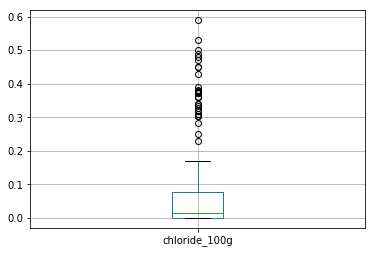

       collagen-meat-protein-ratio_100g
count                        163.000000
mean                          15.417178
std                            3.775843
min                            8.000000
25%                           12.000000
50%                           15.000000
75%                           15.000000
max                           25.000000


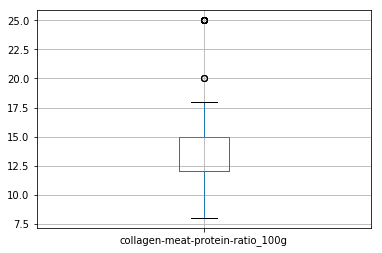

       monounsaturated-fat_100g
count               2163.000000
mean                  16.165372
std                   20.737560
min                    0.000000
25%                    1.790000
50%                    7.200000
75%                   23.000000
max                   82.000000


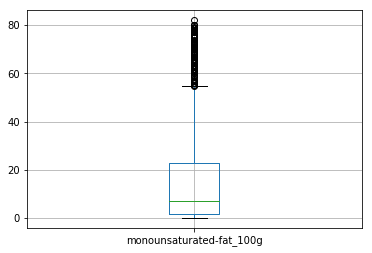

       energy-from-fat_100g
count            841.000000
mean             589.197610
std              716.233913
min                0.000000
25%               49.400000
50%              300.000000
75%              900.000000
max             3830.000000


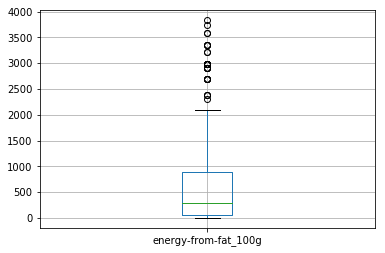

        sugars_100g
count  75368.000000
mean      13.683606
std       19.246450
min       -0.100000
25%        1.000000
50%        4.200000
75%       18.200000
max      105.000000


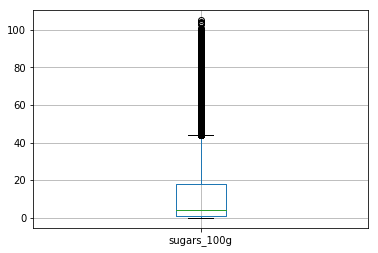

           fat_100g
count  7.000100e+04
mean   2.238198e+05
std    5.921401e+07
min    0.000000e+00
25%    1.100000e+00
50%    6.500000e+00
75%    2.120000e+01
max    1.566667e+10


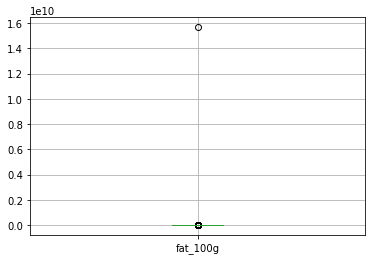

       docosahexaenoic-acid_100g
count                  78.000000
mean                    1.635462
std                     1.978192
min                     0.041000
25%                     0.171500
50%                     0.800000
75%                     3.300000
max                    12.000000


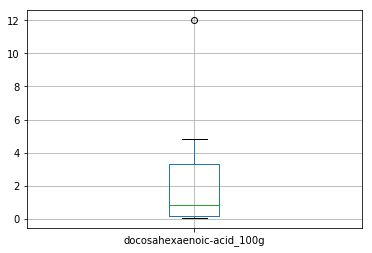

        additives_n
count  75074.000000
mean       1.690252
std        2.444583
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       31.000000


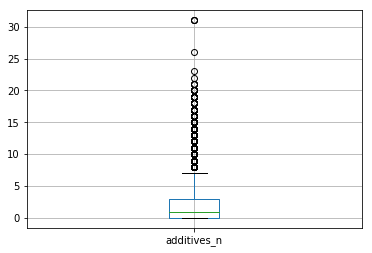

       linoleic-acid_100g
count          156.000000
mean             3.665058
std              6.388284
min              0.090000
25%              0.421750
50%              0.622000
75%              3.600000
max             25.000000


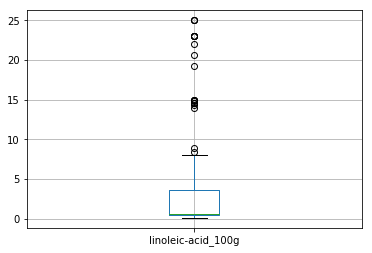

       proteins_100g
count   7.992300e+04
mean    1.960295e+05
std     5.541670e+07
min     0.000000e+00
25%     1.700000e+00
50%     5.880000e+00
75%     1.020000e+01
max     1.566667e+10


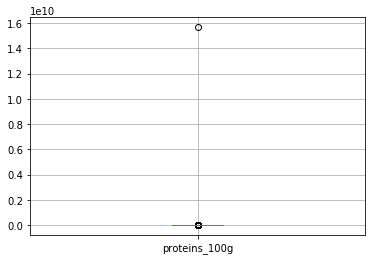

       alcohol_100g
count   4006.000000
mean       7.753010
std       11.017257
min        0.000000
25%        0.000000
50%        4.900000
75%       12.000000
max       97.900000


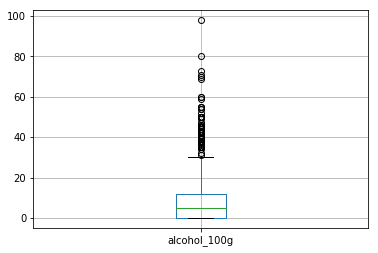

       lactose_100g
count    218.000000
mean       7.210321
std       15.557963
min        0.000000
25%        0.000000
50%        0.030000
75%        5.900000
max       74.500000


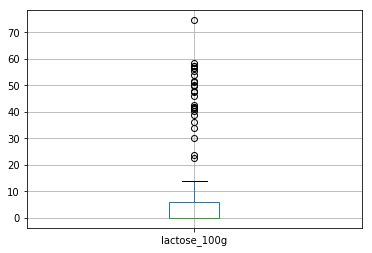

       carbon-footprint_100g
count             265.000000
mean              343.663414
std               427.193443
min                 0.000000
25%                95.000000
50%               196.500000
75%               388.000000
max              2842.000000


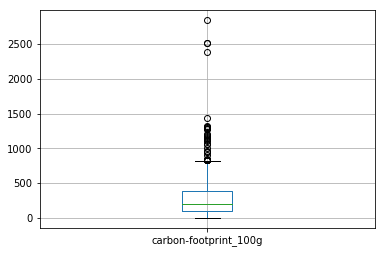

       glucose_100g
count     26.000000
mean       2.878846
std        6.290341
min        0.000000
25%        0.200000
50%        0.250000
75%        1.400000
max       23.200000


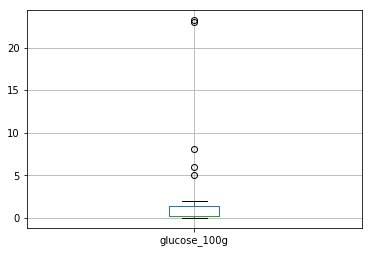

       polyunsaturated-fat_100g
count               2202.000000
mean                   8.761366
std                   14.098590
min                    0.000000
25%                    1.200000
50%                    3.200000
75%                    9.189200
max                   98.000000


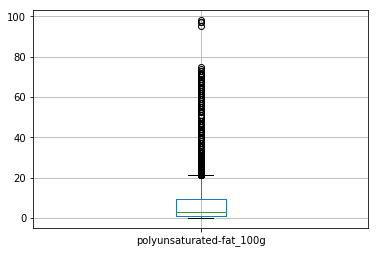

       sucrose_100g
count     71.000000
mean      11.840845
std       14.093459
min        0.000000
25%        2.000000
50%        8.000000
75%       16.300000
max       92.800000


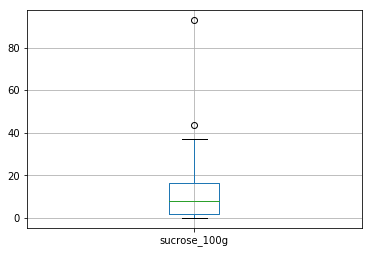

       molybdenum_100g
count        11.000000
mean          0.000401
std           0.001118
min           0.000005
25%           0.000020
50%           0.000039
75%           0.000075
max           0.003760


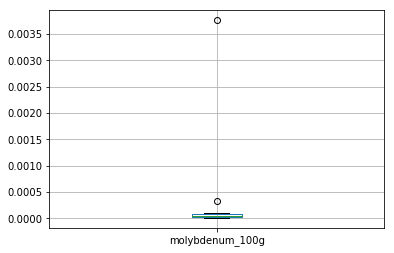

       saturated-fat_100g
count        74590.000000
mean             5.467796
std              8.424761
min              0.000000
25%              0.300000
50%              2.000000
75%              7.600000
max            100.000000


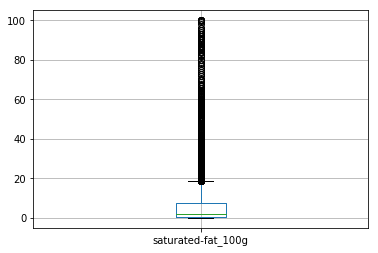

       bicarbonate_100g
count         78.000000
mean           0.121208
std            0.192648
min            0.000006
25%            0.017320
50%            0.036000
75%            0.149225
max            1.250000


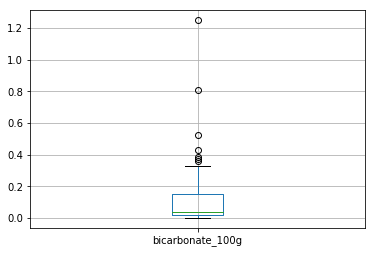

       ingredients_from_palm_oil_n
count                 75074.000000
mean                      0.062378
std                       0.244799
min                       0.000000
25%                       0.000000
50%                       0.000000
75%                       0.000000
max                       2.000000


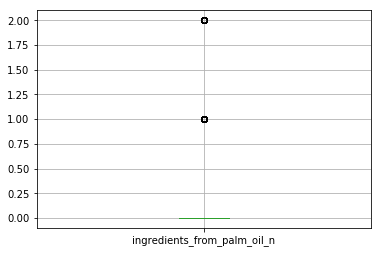

       ingredients_that_may_be_from_palm_oil_n
count                             75074.000000
mean                                  0.123771
std                                   0.414943
min                                   0.000000
25%                                   0.000000
50%                                   0.000000
75%                                   0.000000
max                                   6.000000


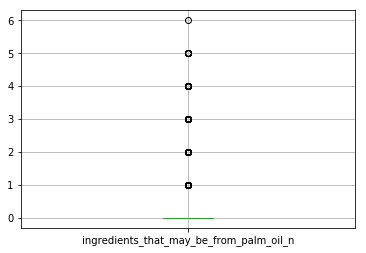

       chromium_100g
count      20.000000
mean        0.000192
std         0.000666
min         0.000007
25%         0.000011
50%         0.000024
75%         0.000054
max         0.003010


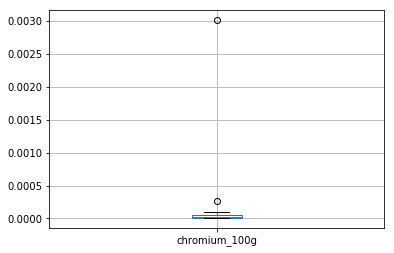

       biotin_100g
count   324.000000
mean      0.123536
std       0.744548
min      -2.000000
25%       0.000005
50%       0.000014
75%       0.000041
max       6.000000


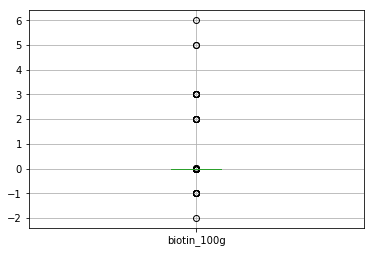

       caffeine_100g
count      49.000000
mean        1.457835
std         5.520588
min         0.003000
25%         0.020000
50%         0.029000
75%         0.044000
max        33.300000


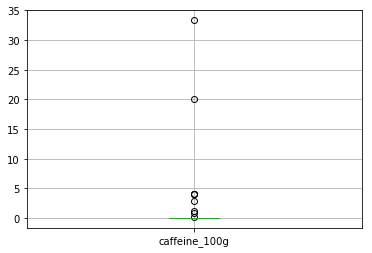

       cholesterol_100g
count       1719.000000
mean           0.015590
std            0.042177
min            0.000000
25%            0.000000
50%            0.000000
75%            0.010000
max            0.432000


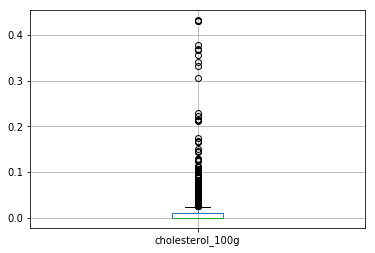

       silica_100g
count    37.000000
mean      0.013269
std       0.041210
min       0.000008
25%       0.001500
50%       0.003170
75%       0.007100
max       0.250000


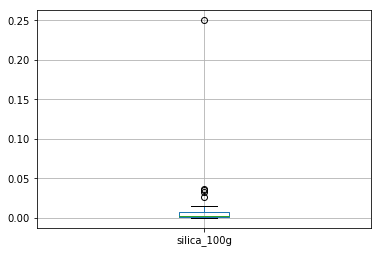

       eicosapentaenoic-acid_100g
count                   37.000000
mean                     3.229432
std                     14.117325
min                      0.050000
25%                      0.200000
50%                      0.500000
75%                      0.700000
max                     85.000000


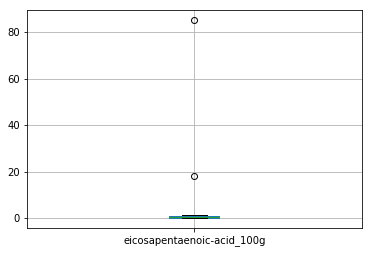

       beta-carotene_100g
count           34.000000
mean             0.518715
std              2.561144
min              0.000000
25%              0.001225
50%              0.005261
75%              0.140000
max             15.000000


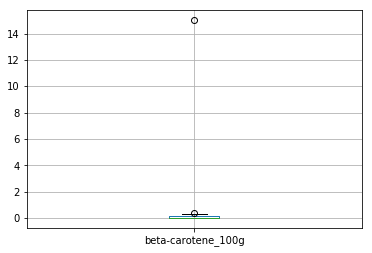

       omega-3-fat_100g
count        826.000000
mean           3.110847
std            5.569539
min            0.000000
25%            0.592500
50%            1.800000
75%            3.200000
max           60.000000


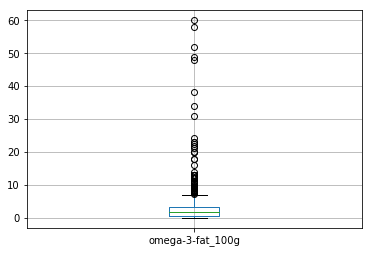

       iodine_100g
count   262.000000
mean      0.000444
std       0.001315
min       0.000000
25%       0.000015
50%       0.000034
75%       0.000105
max       0.014700


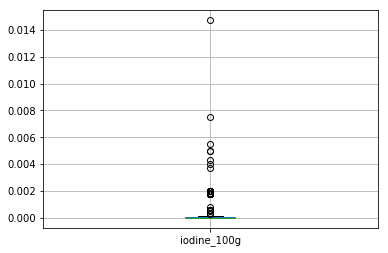

         fiber_100g
count  52874.000000
mean       2.719133
std        4.393244
min        0.000000
25%        0.100000
50%        1.500000
75%        3.500000
max      100.000000


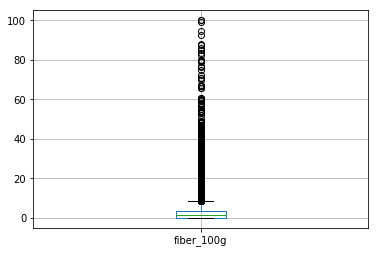

       pantothenic-acid_100g
count             689.000000
mean                0.057634
std                 0.465641
min                -2.000000
25%                 0.000900
50%                 0.002070
75%                 0.005100
max                 5.000000


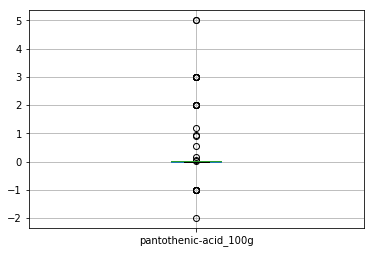

       alpha-linolenic-acid_100g
count                 185.000000
mean                    2.161908
std                     7.901152
min                     0.000000
25%                     0.068000
50%                     0.115000
75%                     0.604000
max                    75.000000


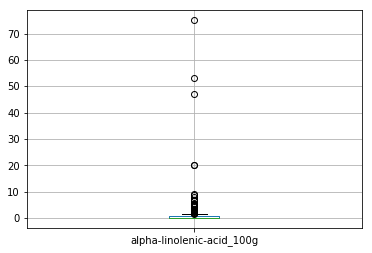

       manganese_100g
count      153.000000
mean         0.016190
std          0.086533
min          0.000000
25%          0.000054
50%          0.000380
75%          0.001500
max          0.700000


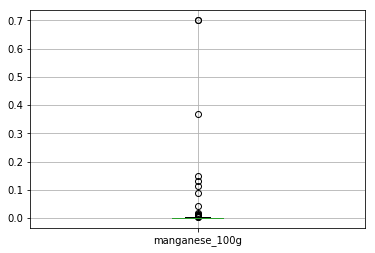

       fluoride_100g
count      80.000000
mean        0.012011
std         0.067534
min         0.000000
25%         0.000019
50%         0.000060
75%         0.000450
max         0.560000


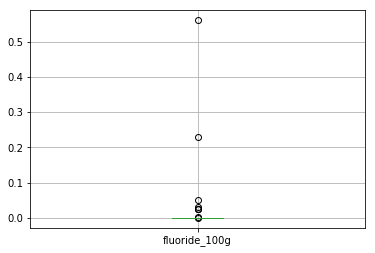

       potassium_100g
count      704.000000
mean         0.654834
std          3.016315
min          0.000000
25%          0.050000
50%          0.190000
75%          0.520000
max         34.600000


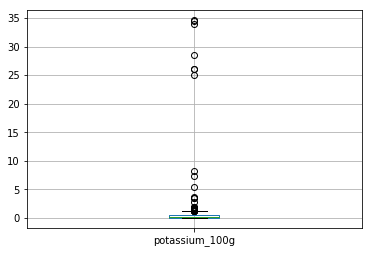

       vitamin-k_100g
count      166.000000
mean         0.000254
std          0.002609
min          0.000000
25%          0.000005
50%          0.000006
75%          0.000030
max          0.033400


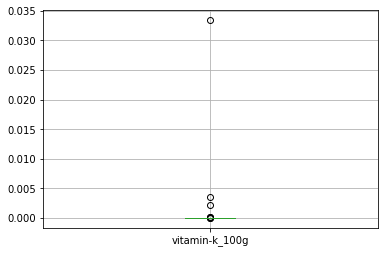

        copper_100g
count  1.630000e+02
mean   2.342508e-01
std    2.944909e+00
min    1.400000e-07
25%    1.405000e-04
50%    3.090000e-04
75%    8.000000e-04
max    3.760000e+01


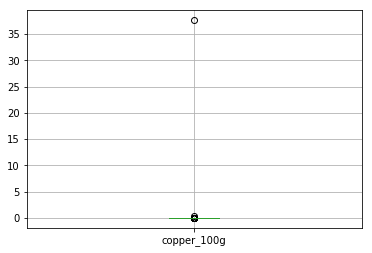

       selenium_100g
count     182.000000
mean        0.000200
std         0.002228
min         0.000000
25%         0.000002
50%         0.000011
75%         0.000024
max         0.030000


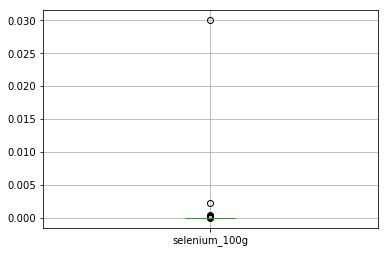

        zinc_100g
count  491.000000
mean     0.022723
std      0.227903
min      0.000000
25%      0.001000
50%      0.002400
75%      0.005185
max      4.000000


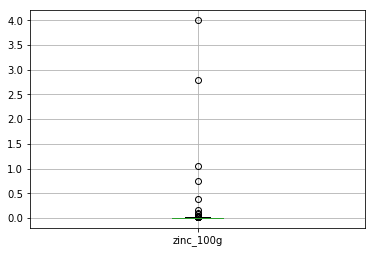

       vitamin-e_100g
count     1300.000000
mean         0.068796
std          0.803731
min          0.000000
25%          0.001800
50%          0.005115
75%          0.012000
max         15.100000


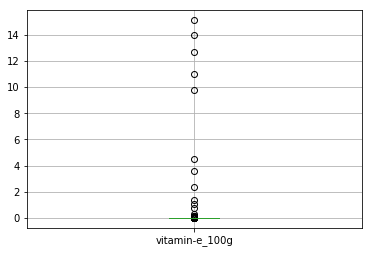

        energy_100g
count  80580.000000
mean    1113.577614
std      884.148359
min        0.000000
25%      407.000000
50%     1022.000000
75%     1653.000000
max    87217.000000


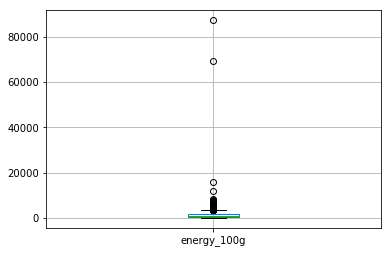

       trans-fat_100g
count     1536.000000
mean         0.137147
std          1.093695
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.300000


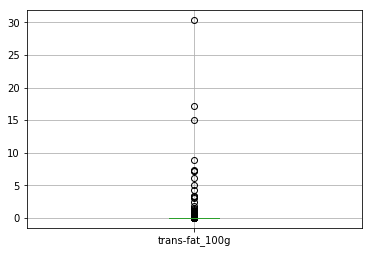

       vitamin-b2_100g
count      1141.000000
mean          0.084642
std           1.101695
min           0.000000
25%           0.000210
50%           0.000700
75%           0.001200
max          30.000000


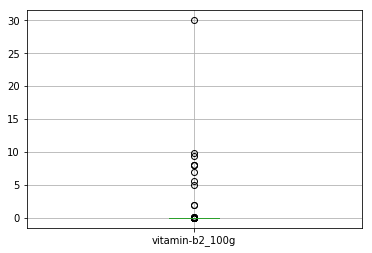

       vitamin-b6_100g
count      1167.000000
mean          0.003843
std           0.043601
min           0.000000
25%           0.000300
50%           0.000800
75%           0.001200
max           1.200000


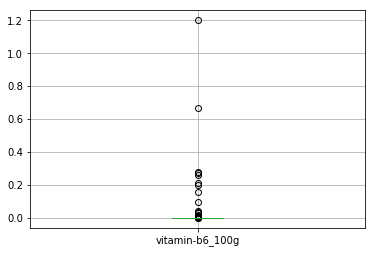

       vitamin-pp_100g
count      1154.000000
mean          0.044615
std           0.570780
min           0.000000
25%           0.003100
50%           0.008000
75%           0.013300
max          15.900000


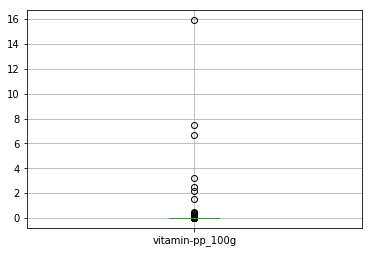

       magnesium_100g
count     1299.000000
mean         0.187869
std          1.569695
min          0.000000
25%          0.025000
50%          0.085000
75%          0.147000
max         39.500000


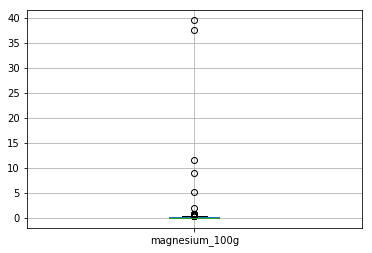

       vitamin-b1_100g
count      1391.000000
mean          0.001844
std           0.016578
min           0.000000
25%           0.000260
50%           0.000600
75%           0.000937
max           0.550000


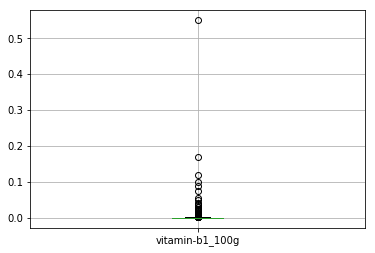

       phosphorus_100g
count       895.000000
mean          0.380323
std           2.859570
min           0.000000
25%           0.139100
50%           0.227000
75%           0.357000
max          84.900000


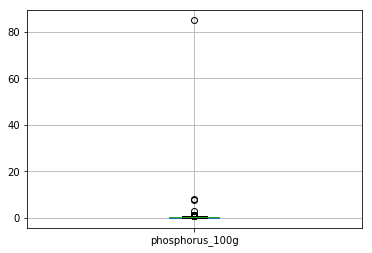

       vitamin-b9_100g
count      1146.000000
mean          0.005091
std           0.120931
min           0.000000
25%           0.000042
50%           0.000119
75%           0.000180
max           4.000000


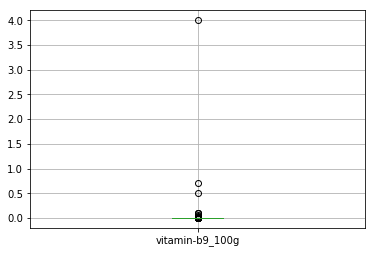

       vitamin-b12_100g
count      1.018000e+03
mean       4.951316e-02
std        1.567136e+00
min        0.000000e+00
25%        3.800000e-07
50%        1.250000e-06
75%        2.100000e-06
max        5.000000e+01


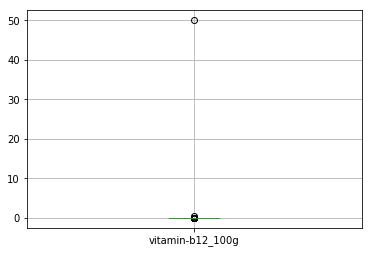

       vitamin-d_100g
count    1.066000e+03
mean     7.074560e-03
std      2.297121e-01
min      0.000000e+00
25%      8.800000e-07
50%      2.300000e-06
75%      6.975000e-06
max      7.500000e+00


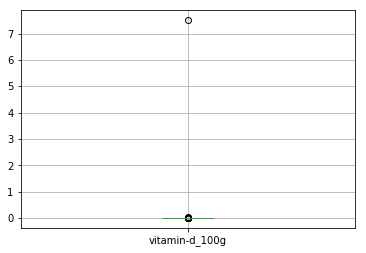

         iron_100g
count  2641.000000
mean      0.030880
std       0.644375
min       0.000000
25%       0.001000
50%       0.002820
75%       0.007000
max      25.000000


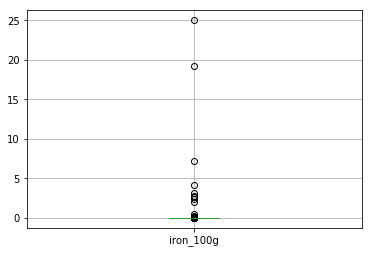

       vitamin-c_100g
count     2879.000000
mean         0.104084
std          2.259079
min          0.000000
25%          0.000000
50%          0.012000
75%          0.026400
max        100.000000


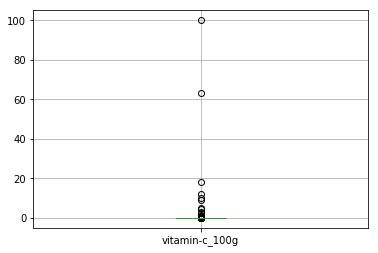

       calcium_100g
count   4367.000000
mean       0.249776
std        1.525764
min        0.000000
25%        0.064250
50%        0.120000
75%        0.230000
max       69.500000


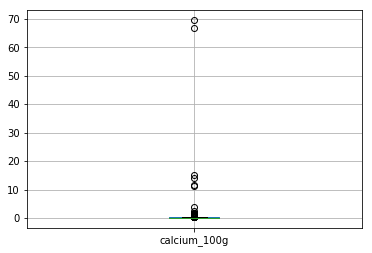

       vitamin-a_100g
count     1929.000000
mean         0.017343
std          0.618689
min          0.000000
25%          0.000000
50%          0.000074
75%          0.000300
max         26.700000


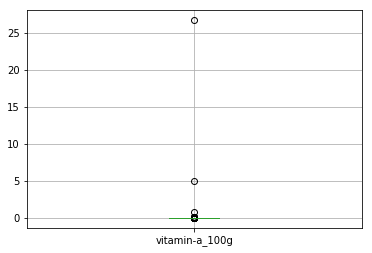

        sodium_100g
count  75268.000000
mean       0.456023
std        2.212267
min        0.000000
25%        0.030000
50%        0.196850
75%        0.472441
max      366.141732


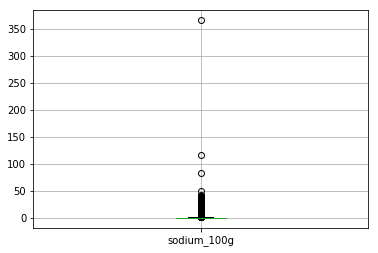

          salt_100g
count  75316.000000
mean       1.157581
std        5.617782
min        0.000000
25%        0.076200
50%        0.500000
75%        1.200000
max      930.000000


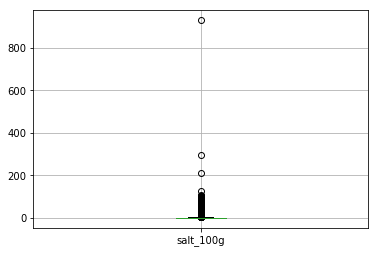

In [151]:
for i in range(dfContinuesSkewed.shape[1]):
    plt.clf()
    sse = dfContinuesSkewed[[dfContinuesSkewed.columns[i]]]
    sse.boxplot()
    print(sse.describe())
    plt.show()

On voit qu'il y a des cas où une valeur semble excentrée, par exemple pour le molybdenum_100g, la valeur maximum est de 0.003760, ce qui est bien supérieur à la moyenne de 0.000401 (qu'elle participe à bien augmenter) et à la valeur de 0.000075 dont 75% des enregistrements se trouvent en dessous. Nous verrons dans la partie exploration que cet enregistrement de code 3401528535864 peut être repéré dans une ACP. Nous verrons aussi que contrairement à l'enregistrement de code 15666666666, nous n'annulerons pas ses valeurs extrêmes. Cet enregistrement a des valeurs très fortes pour quelques autres variables comme le chromium_100g, le beta-carotene_100g et le copper_100g. Il y a d'autres enregistrements qui possèdent des valeurs très fortes, mais parce qu'ils correspondent à des articles très spécifiques dont ces valeurs fortes sont la spécificité. Ils ne sont pas de nature à bouleverser le jeu de données. 

Il y a toutefois d'autres enregistrements problématiques qui mériteraient des investigations supplémentaires, comme par exemple une energy_100g à 87217, alors qu'une barre énergisante n'atteint pas les 2000. Ou une eau minérale pour enfant ayant un taux de sel 66 fois plus élevé qu'une sauce soja...